## Assessing the publication-languages on philpapers
First, load some packages...

In [120]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import re
# !pip install langdetect
from langdetect import detect


import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6))
sns.set_color_codes("pastel")

Get the journals-page...

In [ ]:
response = requests.get('https://philpapers.org/journals')
soup = BeautifulSoup(response.content, "html.parser")

Make lists of every category and build a dataframe...

In [83]:
journal_data = soup.select("span[style='font-size:smaller']") 

ISSN = []
no = []
firstyear = []
lastyear = []

for a in journal_data:
    text = a.get_text()
    ISSN.append((re.findall("(?<=ISSN )[1234567890-]*", text) or [None])[0])#ISSN
    no.append(re.findall("[\d]* articles", text)[0].replace(" articles","")) #no
    firstyear.append(re.findall("(?<=between )[\d]*", text)[0]) #earlyyear
    lastyear.append(re.findall("(?<=and )[\d]*", text)[0]) #lateyear
    
journaltitles =[]
link=[]
for a in soup.find_all('a', href=re.compile("pub")):
    journaltitles.append(a.get_text())
    link.append('https://philpapers.org/'+a['href'])

In [129]:
df = pd.DataFrame(np.column_stack([journaltitles,link,no,ISSN,firstyear,lastyear]),columns=['journaltitles','link','no','ISSN','firstyear','lastyear'])

Access the first page of every journal and identify the most prevalent language of the titles...

In [ ]:
languages = []
for index, row in df.iterrows():
    response = requests.get(row['link'])
    soup = BeautifulSoup(response.content, "html.parser")
    abstracts = []
    for a in soup.findAll('span', attrs={'class': 'articleTitle recTitle'}):
        # One could use abstracts with "div" and "abstract". But I suspect titles are actually more telling, 
        # as there is often an english abstract before a non-english article. Also titles are never missing.
        abstracts.append(a.get_text())
    lang = ''
    if len(abstracts) != 0:
        lang = detect(' '.join(abstracts))
    languages.append(lang)
#    print(row['journaltitles'],lang)

Build and display the dataframe, then visualize the results...

In [118]:
df_lang = df
df_lang["language"] = languages

In [121]:
display(df_lang)

,journaltitles,link,no,ISSN,firstyear,lastyear,language
0,ESPES,https://philpapers.org//pub/277530,70,1339-1119,2012,2017,sk
1,'Ilu. Revista de Ciencias de Las Religiones,https://philpapers.org//pub/4539,686,1135-4712,1989,2018,es
2,A Parte Rei,https://philpapers.org//pub/5700,1376,2172-9069,1997,2011,es
3,Abstracta,https://philpapers.org//pub/3,177,1807-9792,2004,2017,en
4,Accademia,https://philpapers.org//pub/5030,67,1296-7645,1999,2008,it
5,Acm Sigcas Computers and Society,https://philpapers.org//pub/224,927,0095-2737,1972,2019,en
6,Acta Analytica,https://philpapers.org//pub/6,617,0353-5150,1986,2019,en
7,Acta Biotheoretica,https://philpapers.org//pub/7,1471,0001-5342,1935,2018,en
8,Acta Comeniana,https://philpapers.org//pub/5031,498,0231-5955,1958,2016,de
9,Acta Philosophica,https://philpapers.org//pub/1283,725,None,1991,2018,it


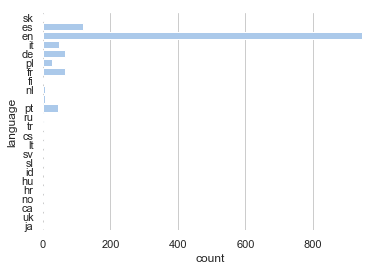

In [128]:
sns.countplot(y='language', data=df_lang, color="b")
sns.despine(left=True, bottom=True)
ax.set(ylabel="",
       xlabel="Count")
for tick in ax.yaxis.get_minor_ticks():
    tick.label1.set_horizontalalignment('center')
plt.show()